In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('Diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
0-0 : correct
o-1 : incorrect
1-0 : incorrect
1-1 : incorrect

In [ ]:
Accuracy = Corerct prediction / total prediction
          Tp+ TN /(TP+TN+FP+FN)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
x = data[['Age']]   #x ma predictor ra y ma target variable 
y =data.Outcome

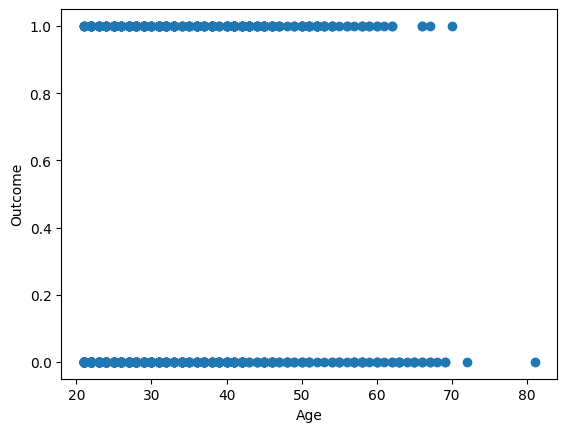

In [7]:
plt.scatter(data.Age,data.Outcome)
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.show()

In [8]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size = 0.2 ,random_state=25)

In [9]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(xtrain, ytrain)


LogisticRegression()

In [10]:
pred_new = pd.DataFrame({
    'Age':[20]
})

In [11]:
#prediction
#age = 40

print(log_model.predict(pred_new))

[0]


In [12]:
#predict_probability

print(log_model.predict_proba(pred_new))


[[0.76359836 0.23640164]]


In [13]:
yprediction = log_model.predict(xtest)

In [14]:
ytest




459    0
39     1
344    0
84     1
700    0
      ..
410    0
114    1
246    0
506    1
597    0
Name: Outcome, Length: 154, dtype: int64

In [15]:
yprediction


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
corerct => 0-0 
           1-1

incorect: 0-1
          1-0

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score


In [17]:
accuracy = accuracy_score(ytest,yprediction)
print(accuracy)

0.6428571428571429


In [18]:
print(f'Accuracy:{accuracy:.2%}') #test gareko data ko accuracy(training ma nadeko data)

Accuracy:64.29%


In [19]:
#confusionm matrix
cm = confusion_matrix(ytest,yprediction)
cm


array([[93, 10],
       [45,  6]])

In [20]:
import seaborn as sns

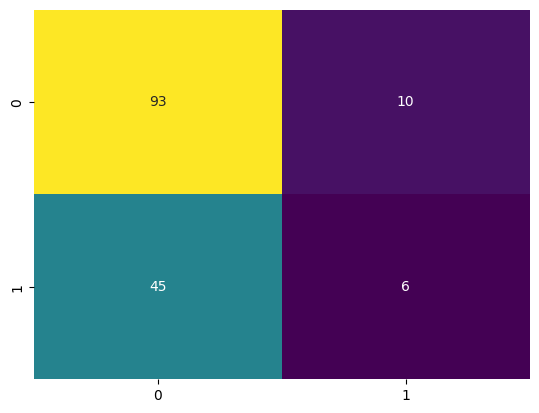

In [27]:
#better visusalization ko lagi
sns.heatmap(cm, annot = True , cbar = False , cmap ='viridis')  #annot = true ley gardda tyo vitraa number aako
plt.show()

###  ACTUAL VALUE LAI ROWS MA RAKHCHHAA
###  PREDICTED VALUE MA COLUMNS 

In [ ]:
Sikit learn ley 1 lai positive 0 lai negative manchhha
6 ---> true positive
93---> true negative 
10 --->
45 ----> 

In [30]:
accurac =(93+6)/(93+6+10+45)
print(accurac)

0.6428571428571429


In [ ]:
1> Accuracy
2> Recall
3> F1 Score 

In [ ]:
#class Imbalance 
 100 rows : 90 lebel : 0
            10 label : 1

yehaaa 90 label ko dataa dherei chhaa so tehaa training data ni dherei paryo so 
chhutaunaa sajelo hunchhaa tara 10 label ko data lai classify garanaa struggle garnu parchhaa


kunei class ko data yekdam dherei chaa kunei ko yekdam kam chaa bhaney ie: class imbalane

Most of the dataa yeutei class ma pardenu(balance nahunu) bhaneko class imbalanace


In [23]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs
)
    Plot rectangular data as a color-encoded matrix.

    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.

    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    v

In [ ]:
class imbalace cha ki nai kasari thaa napaune?
outcome lai count garne


In [34]:

target_count = data['Outcome'].value_counts()
target_count


Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
0 -> diabetes chhaina
1 -> diabetes chhaa
thatmeans 268 jana lai diabetes raichhaa, 500 jana lai naraichhaa

In [36]:
xtrain.shape #xtrain ma kati otaa rows gako?

(614, 1)

In [37]:
xtrain


,Age
118,22
336,44
374,28
518,41
716,31
...,...
317,29
143,42
474,24
318,28


In [38]:
ytrain

118    0
336    0
374    0
518    0
716    1
      ..
317    1
143    1
474    0
318    0
132    1
Name: Outcome, Length: 614, dtype: int64

In [39]:
train_count = ytrain.value_counts()
train_count
#training ma kati data gako raichha?

Outcome
0    397
1    217
Name: count, dtype: int64

In [ ]:
yehhaa 50 % bhanda dherei data o wallaa ma chaa 1 walllaa ma kam chaa
so 0 wallaa ley majajle train data pauchhhaa, 1 wallaa ley little bit struggle garnu parchaa
so its a class imbalance

so model train garnaa accuracy matraa sufficient hudena


In [ ]:
90 - neagtive(0)
10 - positive(1)
aaba confusion matrix kasto vanchhaa ta?
TP = 5          Fp = 5
FN = 5          TN = 85 

In [ ]:
yesto case ma accuracy =?
accuracy = 90/100: 90%   yehaa accuracy nai 90% aaideyo that is good. but yehaa 
data imbalance chhaa  we calcualte precision and Recall

In [ ]:
1> precision = out of positive predictions how much is actual positive 
          = TP / (TP+FP)
        = 5/(10)=0.5 = 50%
 so yehaa 50% matraa actual positive chhaa(50% precison)  but aaghi ta 90% accuracy aako thyo


In [40]:
2> Recall  =how much positive cases , model can capture
           = model ley katii neative cases lai capture garnaa sakyo? 
           = TP/(TP+FN)
        = 5/(10)=0.5 = 50% 
that means hamro model ley 50% matraa positive lai capture garyo
its so dangerous
.yesko aanusar ta 10 jana lai diabetes huda 5 jana lai umm cha diabetes vandeyo aru 
5 janaa lai chhaina vandeyo!!!! yesto ta dangerious vayo... yesle gardaa ta health sector mata
death pani huna sakyooo

In [ ]:
data imbalance ko bellaa accuracy matraa herera predict garnu vayenaa, recall, precision ni
calculate garnu paryo !!

In [ ]:
Recall ra Precision both high vako ramro

In [ ]:
3> F1 -score :: precision ra Recall both high vako high hunchhaa aru bellaa low hunchhaa
formula of F1 score : 2 * precision * recall/(precision +Recall)


In [44]:
#Precision
precision = precision_score(ytest,yprediction)
print(f'Precision: {precision:.2%}')



Precision: 37.50%


In [ ]:
 #interpretation of precision:out of total positive prediction, only 37% are actual positive

In [45]:
#recall
recall = recall_score(ytest,yprediction)
print(f'Recall:{recall:.2%}')

Recall:11.76%


In [ ]:
#interpretation of recall : Out of total positive (actual positive) moodel can only capture
11.76 = 12%

recall yekdam kam aaideyo yehaa ta
 formula:TP/(TP+FN)

In [46]:
#F1_Score
f1_score = f1_score(ytest,yprediction)
print(f'F1_score:{f1_score:.2%}')

F1_score:17.91%


In [ ]:
precision ra recall both kam so so F1_score ni low aaayo!!